In [1]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN,OPTICS,KMeans,MiniBatchKMeans,AgglomerativeClustering

In [2]:
from sklearn.datasets import load_digits

In [3]:
digit= load_digits()

In [4]:
x=digit.data
x.shape
y=digit.target

In [5]:
from sklearn.decomposition import PCA

In [6]:
pca = PCA(n_components=2)
x_new = pca.fit_transform(x)
x_new.shape

(1797, 2)

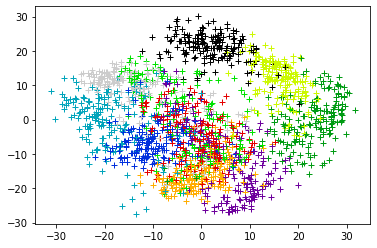

In [12]:
plt.scatter(x_new[:,0],x_new[:,1],marker='+',linewidths= 1,c=y,cmap = 'nipy_spectral')

In [15]:
km =KMeans(n_clusters=10,n_init=4).fit(x_new)

In [16]:
km.cluster_centers_

array([[  4.60078135,  -8.21372177],
       [ -3.56298645,   0.28161861],
       [ 16.36565465,  12.6526413 ],
       [-12.16562685,  11.11045515],
       [-21.81465825,   6.69123722],
       [ -3.79385112, -16.68320038],
       [ 22.55141124,  -0.8407593 ],
       [  9.20106694, -19.58457635],
       [  1.57434252,  21.59548373],
       [-14.31611998,  -6.72857529]])

In [17]:
km.predict(x_new[1,:].reshape(1, -1))

array([7])

In [18]:
y[1]

1

In [19]:
import matplotlib.cm as cm
cluster_labels = km.fit_predict(x_new)
colors =np.array (cluster_labels)
centers = km.cluster_centers_

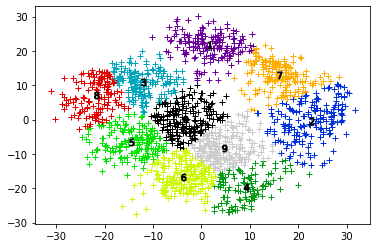

In [20]:
plt.scatter(x_new[:,0],x_new[:,1],marker='+',linewidths= 1,c=colors,cmap = 'nipy_spectral')
# plt.scatter(centers[:,0],centers[:,1],marker='+',linewidths= 3,s=169,color='r')
for i, c in enumerate(centers):
    plt.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

### colors based on real digits labels

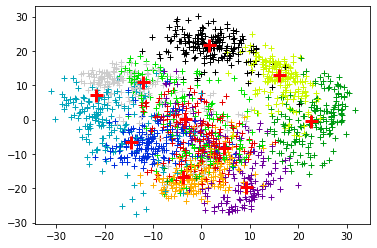

In [21]:
colors=y
plt.scatter(x_new[:,0],x_new[:,1],marker='+',linewidths= 1,c=colors,cmap = 'nipy_spectral')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='+',linewidths= 3,s=169,color='r')

## clusters in kmeans are approximatly match with y classes

In [22]:
# clustering= [DBSCAN (),KMeans (n_clusters=10),MiniBatchKMeans(n_clusters=10),AgglomerativeClustering(n_clusters=10),OPTICS()]
clustering= [KMeans (n_clusters=10),MiniBatchKMeans(n_clusters=10),AgglomerativeClustering(n_clusters=10)]

C:\Users\marziyeh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


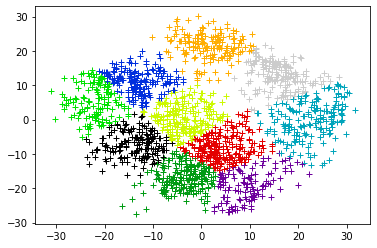

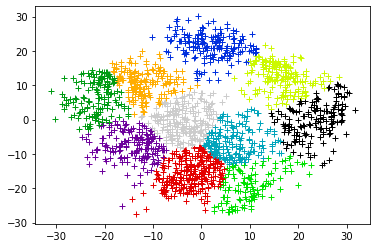

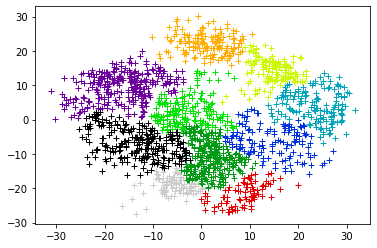

In [23]:
for cluster in clustering:
    cluster.fit_predict(x_new)
    labels =cluster.labels_
    colors= labels
    fig, ax1 = plt.subplots(1, 1)
    ax1.scatter(x_new[:,0],x_new[:,1],marker='+',linewidths= 1,c=colors,cmap = 'nipy_spectral')

## there are some differences between these clustering results

In [24]:
clustering= [DBSCAN(),OPTICS()]

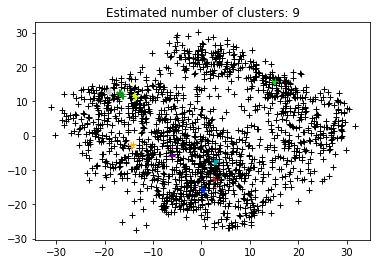

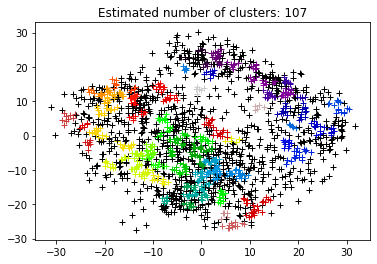

In [25]:
for cluster in clustering:
    
    labels =cluster.fit(x_new).labels_
    colors= labels
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    fig, ax1 = plt.subplots(1, 1)
    ax1.scatter(x_new[:,0],x_new[:,1],marker='+',linewidths= 1,c=colors,cmap = 'nipy_spectral')
    ax1.set_title("Estimated number of clusters: %d" % n_clusters_)

### according to sklearn guides, optic and dbscan are usefull for Very large n_samples, medium n_clusters, so it is better to not use them in this case.